In [1]:
import rebound as rb
import numpy as np
import matplotlib.pyplot as plt

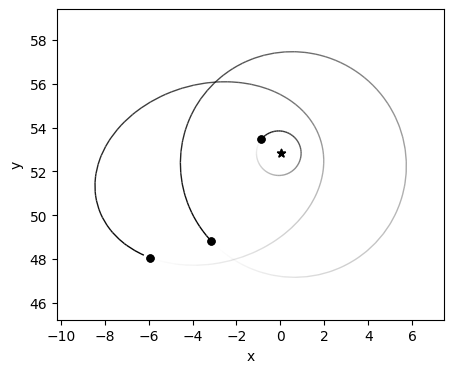

In [2]:
# Crear la simulación
sim = rb.Simulation()
sim.units = "msun", "au", "d"

# El sol
sim.add(m=1)

# Cuerpo pequeño
sim.add(m=1e-4, a=5, e=0.76)
"""
m: masa del cuerpo pequeño
a: semieje mayor de la órbita
e: excentricidad de la órbita
"""
# Júpiter
sim.add(m=1/1000, a=5.2)

# Tierra (comentada)
sim.add(m=1/1000000, a=1)

# Configurar el tiempo de integración
yr = 365.25
N = 100
ts = np.linspace(1000, 15000 * yr, N)
xs = np.zeros(N)
ys = np.zeros(N)
zs = np.zeros(N)
es = np.zeros(N)

# Integrar la simulación y guardar los resultados
for i, t in enumerate(ts):
    sim.integrate(t)
    cuerpo = sim.particles[1]
    xs[i] = cuerpo.x
    ys[i] = cuerpo.y
    zs[i] = cuerpo.z
    orbitas = sim.orbits()
    # Órbita del cuerpo pequeño
    obc = orbitas[0]
    es[i] = obc.e

# Graficar los resultados
#plt.plot(xs, ys, "ko", markersize=3)
#plt.plot(0, 0, "y*", markersize=10)
rb.OrbitPlot(sim)  # Dinamizar simulación
#plt.plot(ts, es)  # Comentada, pero puedes descomentarla si quieres graficar la excentricidad
plt.show()
